<a href="https://colab.research.google.com/github/irahan/Redes-Neuronales/blob/main/Primera_red_neuronal_de_celsius_a_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

In [2]:
import tensorflow as tf # libreria de IA
import numpy as np #trabajar con arreglos numericos

Introducimos los arreglos de nuestros grados celsius y farenheit

In [3]:
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

utilizaremos keras
#capa Densa tiene conexiones de cada neurona a todas las neuronas de la siguiente capa
units 1 - una sola neurona
input_shape.  una entrada de una sola neurona

modelo sequential. 


In [4]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) 
modelo = tf.keras.Sequential([capa])


Prepara el modelo para ser entrenado.
indicaderos optimizador y la funcion de perdida
optimizador Adam  le permite a la red aprender y ajustar los sesgos y pesos.
funcion perdida
mean_squeared_error. 


In [5]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [6]:
print("Comenzar a entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000,verbose = False)
print("modelo entrenado...")

Comenzar a entrenamiento...
modelo entrenado...


Resultado dela funcion de perdida

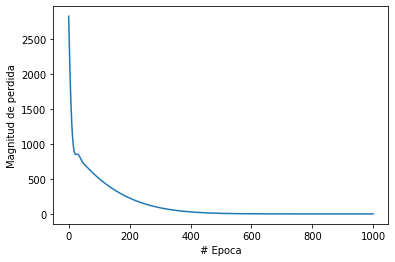

In [7]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [8]:
print("Hagamos una prediccion")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit")

Hagamos una prediccion
El resultado es [[211.74329]] fahrenheit


Que datos se asignaron a la funcion y al sesgo

In [9]:
print("variables internas del modelo")
print(capa.get_weights())

variables internas del modelo
[array([[1.79819]], dtype=float32), array([31.92428], dtype=float32)]


Agregamos mas capas y mas neuronas a la red.

In [10]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,oculta2,salida])


In [11]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [12]:
print("Comenzar a entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000,verbose = False)
print("modelo entrenado...")

Comenzar a entrenamiento...
modelo entrenado...


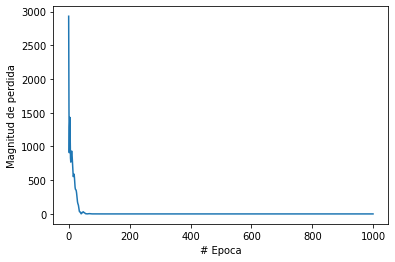

In [13]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [14]:
print("Hagamos una prediccion")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit")

Hagamos una prediccion
El resultado es [[211.74744]] fahrenheit


In [15]:
# Exportar el modelo a formato h5
modelo.save('celsius_a_fahrenheit.h5')

In [16]:
# El equipo trabaja sobre linux, vamos trabajar los comandos
!ls

celsius_a_fahrenheit.h5  sample_data


In [18]:
#Para convertirlo a tensorflow.js, primero debemos intalar la libreria
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 4.7 MB/s 


In [19]:
#Crear una carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [20]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 carpeta_salida

In [21]:
#Confirmar que la carpeta de salaida se hayan guardado los archivos("bin" y "Json")
!ls carpeta_salida

group1-shard1of1.bin  model.json


Bajar los archivos a la computadora.. bajor los archivos bin y json